# Introduction to Jupyter, Programming and R - Part 1

This first part in the Introduction to R series will introduce you to using the R interpreter in a Jupyter notebook. Jupyter -- a mash-up of the words "Julia, Python and R", all programming languages used a lot in science -- enables us to mix up a set of text "notes" (i.e. this bit!) and code "program", which here will be R. This lets you document (in English) your analysis (in code) in a glorious mash-up a bit like a lab notebook, with auto-generated pictures. It's not uncommon to see Jupyter notebooks shared with published papers in the literature, for example, and it's easy to track their changes over time. It can be accessed in a web-browser and provide access to one or more powerful computers under the hood.

It's worth mentioning that there are other ways of running R -- either in the command line, as part of a web-server, or in a standalone program called [R Studio](https://www.rstudio.com/products/rstudio/download/), which provides a slightly different interface to the same "core" of base R (you may find it easier to get going and use on your home computer). We've gone for Jupyter here because the practical course had it installed already -- and it is widely used, particularly among teams of scientists. 

### Notation and hints 

The point of this document is to get you to "play" with R in Jupyter. You'll probably make mistakes, see the word `syntax error` a lot, and mostly likely be frustrated at some point. Computers are like petulant toddlers: they do _exactly_ what you tell them to do, no more, no less. The main ways to learn are by doing, trying, and asking for help, be it from a demonstrator or a search engine (which is, I promise, how professionals do it!). 

Throughout this document, we'll have a series of questions marked by a bullet point before them. It's suggested you try and answer these when you get to them. 

* This is an example question, but it is not a question! 

As Jupyter mixes "text" and "code", it's sometimes useful to be able to refer to code in the text. We'll denote code you should expect to be able to run as-is `by using this font` in the text. Note that the colour of the text sometimes changes to make things easier to see -- this is called syntax highlighting, and there is no meaning to it beyond that.  

### Cells and the Kernel 

Jupyter breaks down content into different "cells" -- each cell can either be a block of R-code, together with its corresponding output, or as "Markdown" -- this text. To run the contents of a cell, select it, and press shift-enter (or choose Cell -> Run Cells from the drop-down menu above). To create a cell, choose "Insert" and select either above or below. You can change what type of cell it is (i.e. `R` or Markdown), select it and look in Cell -> Cell Type, or from the little drop-down box above this cell, by the "run" button. 

You can edit the code that runs in a cell by double-clicking on it (including this one!) 

The kernel drop-down menu refers to the underlying instance of `R` that keeps running behind the scenes. Sometimes you might wish to restart it -- for example, if you have set a big calculation going that is taking too long to finish and you wish to stop it halfway through. You can do that in this drop-down menu. Likewise, a little `*` will be displayed if R is currently running the command you gave it, on the left, by the input into the cell. 

### Markdown 

Markdown is a simple way of writing text with a small amount of formatting in plain text -- formatting like links, *italics*, **bold text** and section headings (like "Markdown" above). It's really easy to use -- type `*one star around a sentence*` to make it *appear in italics*; `**two stars for**` **bold**; ``put back-ticks (`) to make code appear as code``; prepend a line with the hash symbol (`#`) to make it a heading (make it smaller with more hashes together) and there are lots of [other options beyond.](https://markdown-guide.readthedocs.io/en/latest/basics.html) 

* **Q**: As a little exercise, create a cell below this one, set its type to "Markdown" and create a heading saying "Hello World!" and text below that of your choice. Run the cell and observe your contribution to this document! 

# The overall plan 

We're going to teach you about data types in R, how to import data into R, and then how to get it to both make pretty plots and do interesting stats on some example datatypes. 


# Basic R (aka an introduction to programming)
If you've done any programming before, the following might be familiar -- if so, feel free to skip to the section about data frames towards the end. `R` has some differences other languages, and advanced readers might like this "[quite advanced cheat sheet](https://github.com/karoliskoncevicius/tutorial_r_introduction/blob/main/README.md)". 

If not, buckle up, you're in for a wild ride! Programming is the art of getting a computer to do what you tell it to. It's a very useful skill. It's also very frustrating: you need to think what you want to do, formulate it in a clear way, and tell it to the computer in a form it can understand. For stats, fortunately in `R` most of the actual "stats" functions are built in -- the difficulty usually comes from getting your data in a form that the "stats bits" understand. 

The rest of this document covers data types and parts of the `R` syntax. What is a syntax, in the context of a programming language? Well, the computer needs a set of rules to turn what you write into things that it can (unambiguously) understand -- often using lots of symbols on the keyboard to concisely mean a precise thing -- and the word "syntax" refers to that set of rules. A 'syntax error' therefore means that the comptuer can't understand what it is you're telling it and you have made a mistake somewhere in what you meant. 

### Getting help and citing others

R has a fairly comprehensive built-in help system. To get help on a command or function, type `help("something")`, replacing `something` with the thing you want help on. Some packages of work also have more extensive documentation, called a "vignette", which can be accessed by calling `vignette("something")`. If you have a problem, do try searching for it online -- often others have exactly the same problem. 

Finally, if you use a piece of maths written by another in `R` in a written report, it is polite to cite them. You can use the `citation` function to find out how to cite the specific version of R you are using. 

## Variables, arithmetic operations, vectors, and functions

Let's start by using this computer as a calculator.

Arithmetic operators work just as you learnt to use them on a calculator, including precedence of operators and 
brackets. For example: 

In [15]:
100 / 2 - 2 ^ 3 + 5 * 2

[1] 52

In [16]:
100 / (2 - 2 ^ 3) + 5 * 2

[1] -6.666667

By default, `R` is "printing" what you just did back to us -- so we see the results of the operations above. 
If we define a *variable* as a *named object* that contains something, then it won't, unless we either just type the variable's name itself or ask `R` to `print()` it for us. For example: 

In [2]:
x <- 42 

In [3]:
x

[1] 42

In [4]:
print(x) #The [1] that print returns just tells us that there is one number printed -- 42 here. Note also that this is a comment -- ignored by R! 

[1] 42


Here, we've used the assignment operator (`<-`) to make `x` equivalent to 42. In R, I could also use the equals sign (`=`), which is what most other programming languages use for this. 

Note that it is an *assignment* -- whatever value `x` had beforehand, it is given this value. If `x` did not previously exist, it is "created". By convention, most `R` programmers use `<-` for assignment and reserve `=` for the named arguments to a function (described later) where the use of the symbol is required. 

* Create a cell above or below here, try some simple arithmetic, assign a value to a variable, and get help on the print function. 

Here's an example of why variables are powerful things, and also why giving them good names is a good idea: 

In [53]:
AvogadrosConstant <- 6.02e23 #Note that the "e23" bit here means *10^23. 

ConcentrationOfAGlucoseSolution <- 32 #mM 
VolumeOfTheSolution <- 1 #litre 
NumberOfGlucoseAtomsIHave <- (ConcentrationOfAGlucoseSolution*1e-3) * VolumeOfTheSolution * AvogadrosConstant 
print(NumberOfGlucoseAtomsIHave)

[1] 1.9264e+22


I want to do the same calculation above with different numbers, I can just change them, re run it, and get a different answer. There are some rules about what variable names can and can't contain (spaces!) and some ways to bend those rules if you really want to. If you stick to simple but descriptive names either separated with `CamelCase` or `words_with_underscores_in_them`, your colleagues and future self will probably thank you. 

## Types 

The numbers above are just that -- numbers. We might have assigned them to names, but they're still just numbers -- albeit with a decimal point. For a computer working in binary under the hood, it turns out that it makes sense to distinguish between two types of real numbers: integers, the whole (counting) numbers, and "double precision floating point" numbers that have a decimal point (the "floating point" bit -- the decimal point can move) and a number of decimal places (the "double precision" bit). You can't represent an infinite number of decimal places easily, and so floating point numbers are subject to a truncation error that *may* affect your calculations, but `R` does a pretty good job of managing that for you under the hood. You can also have complex numbers -- which are a pair (real/imaginary) of doubles.

There's more to life than just numbers, however. Sometimes we'd like to store things that are dates and times, or plain text (often known in computing as either "characters", or "strings", `"which are encased in double quotes"`). Other times a single "true or false" needs to be stored -- something `R` calls a `logical` value that is either `TRUE` or `FALSE` (another name you might find for these is 'bool' or 'boolean'). As programmers are lazy, `R` lets you shorten these to `T` or `F` if you prefer. 

These are all examples of a variable's *type* -- what it *is*. Computer scientists make a strong distinction between "statically typed" and "dynmaically typed"  programming  languages -- either where you say ahead of time what type of data a variable is, or where the language guesses . `R` is mostly dynamically typed, but provides a few "hints" and functions to help you navigate this sometimes tricky issue. 

Note that this prevents you from shooting yourself in the foot occasionally. I can easily compute `1+5.25`,for example, but if I'm trying to evaluate `1+"I like cats"`, I've probably made a mistake. Other programming languages may provide a (nonsense) answer to that question. `R` at least tells you this doesn't make sense (albeit in a slightly obtuse way). You can check the type of an object by using the `typeof` function, although `R` will tell you in other places if it thinks it is relevant.  

Some examples: 

In [18]:
typeof(3.141) 

[1] "double"

In [10]:
1+"I am allergic to dogs"

ERROR: Error in 1 + "I am allergic to dogs": non-numeric argument to binary operator


In [12]:
typeof("A string of characters in a row has the type of")

[1] "character"

In [14]:
typeof("10")

[1] "character"

In [17]:
5+as.numeric("10") #The "as.numeric" function lets me coerce strings to numbers, if required. 

[1] 15

In [21]:
as.character(35) #Lots of other "as." functions exist for this sort of problem. Note the quotes on the output, indicating it's a string. 

[1] "35"

There are many more types beyond these. Some of them are quite esoteric and obscure, but others are really important -- dataframes and factors, for example, which we'll come to in a bit. 

## Vectors 

If you want to perform the same operations on more than one number, vectors are there to help. In R, a vector will always contain more than one element of the same type (typically numeric values, but there are character, complex, logical and integer vectors too). Vectors can be built "manually" using the concatenation function ```c()``` or they can be read from files, returned by functions, or generated by the results of mathematical operations if appropriate. 

To store the elements of a vector in a variable (called `x` below), just assign the vector's elements to `x` with the `<-` assignment operator.  
Note that ```print()``` is a function that when called, prints the contents of the variable passed as an argument on the display -- and if we have multiple outputs it tells us where we got up to in square brackets on the second line.

In [30]:
x <- c(1, 1, 2, 3, 5, 8, 13)
print(x)

[1]  1  1  2  3  5  8 13


In [31]:
x * 2 - 1

[1]  1  1  3  5  9 15 25

Operations can be carried out between vectors too:

In [32]:
y <- c(3, 1, 4, 1, 5, 9, 2)
x + y

[1]  4  2  6  4 10 17 15

* **Q:** What happens if I try to add two vectors of unequal length? 
* **Q:** How do the `*` and `/` operators work with two vectors? 

There are many other ways of defining a vector. Numerical sequences can be generated using the `seq()` function. These can come in handy when timepoints have to be defined to examine a physical process over some period -- or if you just want to create a list of numbers in general.   

`seq()` is an example of a function that takes *at least* two numbers as arguments: the lower and upper bounds of an interval. The R interpreter will then generate a sequence of numbers between the two limits using a step size of 1. If a third number is provided, this will be considered as a step size.

In [22]:
z <- seq(0, 1)
print(z)

[1] 0 1


In [23]:
z <- seq(0, 1, 0.1)
print(z)

 [1] 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0


Because it's a bit hard to remember the order in which arugments come, `R` lets functions (like `seq()`) have "named arguments" whereby we state explicitly state *what bit* of information we want to pass, using the equals sign. This is much easier to see in practice than to try to describe: the above is identical to the following...

In [24]:
z <- seq(from=0, to=1, by=0.1)
print(z)

 [1] 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0


...but *not* identical to 

In [26]:
z <- seq(to=0, from=1, by=-0.1)
print(z)

 [1] 1.0 0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0.0


where we've swapped the direction of the vector, the order of the arguments, and the sign of the difference ("`by`") along the way. This makes code *much* easier to read, particularly when it gets complex. 

As mentioned before, vectors can contain logical values too (i.e. `TRUE` or `FALSE`). These values can represent states (e.g. a patient having type 2 diabetes) or can be a result of evaluating a logical expression, as shown below. We want to find the negative values in the difference between vectors x and y (defined earlier).

In [14]:
print(x - y)
negatives <- (x - y) < 0
print(negatives)

[1] -2  0 -2  2  0 -1 11
[1]  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE


## NaN and NA

There is a special data type in R, called `NaN` (not a number) and another one called `NA` (not available). These two don't refer to a specific value, but rather represent an undefined value (e.g. 0/0 would evaluate to NaN) or a missing value (in the case of NA) that your experiment didn't measure. If you didn't measure something in an otherwise complete block of an experiment (i.e. the machine broke) then it's a good idea to enter `NA` for it. 

In [29]:
x <- c(1, 2, 3, 0/0)
print(x)

[1]   1   2   3 NaN


The `R` interpreter always does what it is being told to do, therefore if we want to perform operations on a vector that contains `NaN` or `NA` values, those operations will likely return `NaN` or `NA` as a result. `R` needs to be told to skip `NaN` or `NA` values from operations. The example below shows that the average of the numbers defined in vector x cannot be determined if we also consider the NaN element. Roughly speaking, this is the "safe" thing to do as a default, but often it's frustrating for the user! So, for the example above, if we ask `R` to compute its mean, we helpfully get told that it is...

In [30]:
mean(x)

[1] NaN

Once we remove that element, we get the average of 1, 2, and 3. To do so, we can use a named parameter of the ```mean()``` function. Named parameters (na.rm in this case) do not have to listed in any particular order in the parameter list of a function. The ```na.rm``` parameter indicates to the ```mean()``` function whether `NA` or `NaN` values should be ignored during the calculation.

In [31]:
mean(x, na.rm=TRUE)

[1] 2

* **Q:** Create a sequence of numbers from 20 to 50, and then find the mean of these numbers. 
* **Q:** Find the sum of numbers from 51 to 91 (hint: `R` has a `sum` function).

## Indexing

It is sometimes necessary to refer to a __specific element__ or a __portion__ of a vector as part of a subset calculation. This can be done by indexing. `R` allows indexing of vectors using square brackets (`[]`) that take one number as an input that corresponds to the "address" of the vector you wish to see. This address starts at 1 for the first element (beware: some other programming languages start counting from 0!) 

For instance, the following line will return the second element of the vector `x` from above:

In [32]:
x[2]

[1] 2

While this line, using the colon operator, will return all elements between element 1 and element 3 (so just elements 1, 2 and 3 in this case).

In [34]:
x[1:3]

[1] 1 2 3

Indexing can also be used to __exclude__ elements from a vector by prefixing the index term with a minus sign. This drops the second element, for example:

In [35]:
x[-2]

[1]   1   3 NaN

Another way of indexing a vector is to pass in a vector of logical values, containing true if we want to keep the value at that place, or false otherwise. For example:  

In [37]:
x
x[c(F,F,T,F)]

[1]   1   2   3 NaN

[1] 3

A more complicated way to refer to vector elements is by constructing logical expression. Let's say we want to have only the numeric elements that are greater than 1. It may be tempting to try this:

In [21]:
x[x > 1]

[1]  2  3 NA

... but it will return the NA element too, which we didn't want. So we'd have to "filter" that one out, by combining the greater than condition with a function that only returns indices of non-NA elements. 

### Logical operators 

Since we want to have the two conditions to be true simultaneously, we use the `&` operator which corresponds to logical __and__. Logical __or__ can be achieved with `|` and logical __negation__ (i.e. taking the NOT) is represented by `!`. If we want to test to see if two things are equal, we have to use the `==` operator. 


To determine is an element is `NA` the ```is.na()``` function can be used. This function checks if a passed value (or entire vector) is `NA` and returns `TRUE` for `NA` elements and `FALSE` otherwise. You can build really remarkably complex sets of "rules" out of doing this, although sometimes things are better done another way.

In [22]:
x[!is.na(x) & x > 1]

[1] 2 3

In [43]:
x[!is.na(x) & (x == 1 | x == 3)]

[1] 1 3

In addition to arithmetic and logical operations, several mathematical functions are available in R: `min, max, log, exp, sin, cos, tan` all work in the usual way.

In [23]:
print(y)
max(y)

[1] 3 1 4 1 5 9 2


[1] 9

There are two special functions that can tell more about a vector. `length()` provides the number of elements in a vector, while `range()` returns the minimum and maximum values of a vector - corresponding to ```c(min(y), max(y))```.

In [24]:
length(y)
range(y)

[1] 7

[1] 1 9

* **Q:** What happens to == if you pass it a vector?  
* __Harder Q:__ Define a vector of 20 elements randomly sampled from a normal distribution with a mean of 60. Print the vector then print every third element of the vector. (Hint: use the ```rnorm()``` function. You might also like to know about the modulo operator, `%%`, which returns the remainder after division of one numberby another. So, for example `(15 %% 5)` is 0, because  3\*5 is 15 with nothing left over -- but `(3 %% 5)` is 3.)

# Other ways to structure data
In the first part we only used vectors - a collection of values of the same type (e.g. numeric, logical). They are useful for storing simple, homogenous datasets (e.g. Fibonacci numbers, heights of a group of people). The moment a more complicated set of measurements or an entire data set arises, you have a variety of different vectors floating around and it may be that this data type of vectors become disadvantageous.

## Matrices 
Let's look at an experiment involving growing bacteria. Let's assume that we have 5 petri dishes each containing the same type of bacteria, however, four of the five bacteria have been genetically modified to alter their growth rate. We will follow up the area of the petri dishes taken up by bacteria over 7 days, taking a note of the area occupied by various bacteria in their petri dish every day. By the end of the week we will end up with 5 × 7 = 35 measurements. If we wanted to analyse these measurements we could put them all in a vector, but then teasing out the different days and petri dishes would be difficult. However, we can organise the measurements in a "table" or a __matrix__, as it is called in R. Matrices are two-dimensional data structures that can contain the same data types as a vector - in our case numeric values. A matrix can be defined as a vector whose elements we reogranise to fit the particulars of our data set.

In [61]:
# Values in this matrix refer to the percentage of area occupied by bacteria in each petri dish
areas <- matrix(c(0, 0, 0, 0, 0, 10, 10, 20, 10, 40, 20, 20, 40, 30, 80, 30, 40, 60, 70, 100, 40, 80, 80, 100, 100, 60, 90, 100, 100, 100, 70, 100, 100, 100, 100), 
                nrow=5, ncol=7)
print(areas)

     [,1] [,2] [,3] [,4] [,5] [,6] [,7]
[1,]    0   10   20   30   40   60   70
[2,]    0   10   20   40   80   90  100
[3,]    0   20   40   60   80  100  100
[4,]    0   10   30   70  100  100  100
[5,]    0   40   80  100  100  100  100


If you need to count how many rows or columns the matrix has, `nrow` and `ncol` will help (here we've set it to be 5 and 7 -- but running `nrow(areas)` will tell us `5`). 

The indexing of matrices is very similar to indexing vectors, the difference being that for matrices both a row and a column index has to be specified. To select the weekly evolution of areas in dish number 3, we can write:

In [42]:
print(areas[3,])

[1]   0  20  40  60  80 100 100


Notice how there now is a comma inside the square brackets containing the indices. The term before the comma refers to rows and the one after the comma refers to columns. In the example above we only provided a row index, meaning that only values on row 3 would be returned, but by skipping a column index values from all columns will be included in the result. To return all observations made on day 5 we would do opposite:

In [43]:
print(areas[,5])

[1]  40  80  80 100 100


## Arrays 
__Arrays__ are extending the limit of two-dimensionality of matrices by allowing to add additional dimensions. Using the experiment from above, we may choose to examine multiple bacteria at the same time and evaluate their growth rates. Thus, we may end up with two or more sets of 5 × 7 matrices. Instead of using a single matrix for each bacterium, we could store all the measurements in an array. Note that the elements of an array are passed on as a vector and so are the dimensions. ```dim=c(5, 7, 2)``` refers to an array of size 5 × 7 × 2 -- and `dim` its "dimensions"

In [44]:
areasArray <- array(c(0, 0, 0, 0, 0, 10, 10, 20, 10, 40, 20, 20, 40, 30, 80, 30, 40, 60, 70, 100, 40, 80, 80, 100, 100, 60, 90, 100, 100, 100, 70, 100, 100, 100, 100, 
                      0, 0, 0, 0, 0, 10, 10, 10, 10, 20, 20, 20, 30, 30, 55, 30, 35, 50, 59, 77, 40, 70, 60, 78, 90, 75, 90, 80, 88, 100, 90, 100, 100, 100, 100), 
                    dim=c(5, 7, 2))
print(areasArray)

, , 1

     [,1] [,2] [,3] [,4] [,5] [,6] [,7]
[1,]    0   10   20   30   40   60   70
[2,]    0   10   20   40   80   90  100
[3,]    0   20   40   60   80  100  100
[4,]    0   10   30   70  100  100  100
[5,]    0   40   80  100  100  100  100

, , 2

     [,1] [,2] [,3] [,4] [,5] [,6] [,7]
[1,]    0   10   20   30   40   75   90
[2,]    0   10   20   35   70   90  100
[3,]    0   10   30   50   60   80  100
[4,]    0   10   30   59   78   88  100
[5,]    0   20   55   77   90  100  100



## Lists

R also allows mixing of different data types via the use of __lists__. This data structure allows the "packaging" of more than one data type into a single data unit. In addition, elements of a list can be named, making it easier to reference them. Let's now consider a series of concentration measurements taken at equal time points. Let's also assume that once the concentration reaches a fixed value, a a light bulb is turned on (for instance to signal a dangerous concentration of lead in running water). If we want to store the time points, concentrations and the state of the light bulb, we could construct a list:

In [42]:
# We will read the concentration value every minute; concentration is defined in ug/l;
# we encode the bulb's state with 1 if it's on and 0 if it's off. A cut-off of 10 ug/l
# will be considered as the upper limit of acceptable lead concentration in water.
waterQualityList <- list(seq(0, 10, 1), 
                         c(1.0, 2.0, 1.5, 3.0, 4.0, 6.0, 11.0, 15.0, 8.0), 
                         c(FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, TRUE, TRUE, FALSE))
names(waterQualityList) <- c("TimePoints", "LeadConcentration", "BulbState")
print(waterQualityList)

$TimePoints
 [1]  0  1  2  3  4  5  6  7  8  9 10

$LeadConcentration
[1]  1.0  2.0  1.5  3.0  4.0  6.0 11.0 15.0  8.0

$BulbState
[1] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE



From here on, we can operate on list elements just as if they were vectors, by simply referencing them as ```waterQualityList$TimePoints```, for instance. Alternatively, we can always use the square bracket-based indexing, but instead of only using one pair of brackets, we'd have to embed two sets in one another:

In [43]:
# Print lead concentrations
print(waterQualityList[[2]])

[1]  1.0  2.0  1.5  3.0  4.0  6.0 11.0 15.0  8.0


Since lead concentrations are stored in a vector, we can now reference individual or group elements of this vector by appending a single set of brackets at the end of the expression from above:

In [44]:
# Print last five measurements
print(waterQualityList[[2]][5:9])

[1]  4  6 11 15  8


R offers support to represent categorical data, i.e. data that can take only a finite number of values. Cardinal directions are a good example as they can only take four values: north, south, east and west. Such data can be stored in __factors__. Let's consider now a group of patients suspected of having non-alcoholic fatty liver disease. These patients have all undergone liver biopsy and the amount of fat in the sample was determined. This is a semi-quantitative measure as it only reports the relative area of fat globules in a given biopsy sample. Depending on this relative area, steatosis (i.e. fat) is staged into four categories or stages: 
1. S0: fat area < 5%
2. S1: 5% $\geq$ fat area < 33%
3. S2: 33% $\geq$ fat area < 66%
4. S3: fat area $\geq$ 66%

In the following example we will define a factor to describe steatosis stages and then determine the average relative area of fat globules within each steatosis stage group.

In [45]:
# Define the factor first
steatosisStage <- c("S0", "S0", "S2", "S1", "S2", "S0", "S1", "S3", "S1", "S2", "S3")
steatosisStageF <- factor(steatosisStage)
levels(steatosisStageF)

[1] "S0" "S1" "S2" "S3"

In [46]:
# Then define relative areas in biopsy samples
fatFraction <- c(2.3, 3.0, 45.3, 12.5, 35.6, 0.6, 7.8, 73.7, 13.3, 40.5, 89.0)

Finally, we can *apply* the mean function on the relative areas corresponding to each steatosis stage. This just takes the mean over each part of the list. There are other forms of the `apply` function that are commonly encountered, like `sapply` that compute a function on some data. Here that function is the mean. This is one way (but arguably not a good way!) of computing the mean on a list. 

In [50]:
tapply(fatFraction, steatosisStageF, FUN=mean)

S0        S1        S2        S3 
 1.966667 11.200000 40.466667 81.350000

## Data Frames
The final data stucture we will be covering in this first part of the course is the __data frame__. This can be imagined as a two-dimensional table with columns representing different observations (possibly of  different data type) and rows are unique combinations of those observations.  This is super useful! You put your experiment's data into a data frame, and then can explore and plot it later on.


A typical example is a data table consisting of measurements taken from patients undergoing blood tests and liver stiffness measurements (LSM) using vibration-controlled transient elastography (VCTE). The code below defines a portion of such a table. In practice, we might use another function (such as `read.csv`) to load this from another source, but here we have typed it in directly. You will notice that columns in the data frame may contain data of a different type from other columns. However, data in a column should be of the same data type. Each column is basically a set of measurements of a certain type; each row is a certain patient. 

In [72]:
patientData <- data.frame(
   patientId = c (1:5),
   age = c("76", "18", "47", "62", "28"),
   diabetic = c(TRUE, FALSE, FALSE, TRUE, FALSE),
   ALT = c(33, 362, 101, 80, 168),
   LSM = c(4.4, 11, 16.9, 35.3, 6.2)
)
patientData #Note that Jupyter shows the data quite neatly as a table!

patientId,age,diabetic,ALT,LSM
1,76,TRUE,33,4.4
2,18,FALSE,362,11.0
3,47,FALSE,101,16.9
4,62,TRUE,80,35.3
5,28,FALSE,168,6.2


Data frames can also be indexed, in a similar manner to matrices using a pair of indexing expressions within square brackets. If we want to extract the age and ALT of patient 2 and 4, we could write:

In [52]:
patientData[c(2, 4), c(2, 4)]

,age,ALT
2,18,362
4,62,80


If we wanted to apply a function to a whole column of data -- which is handy, for example, in order to interpret age as a number rather than a string -- we can use the $ symbol to access a column by its name. We can also assign things to it alone. So, this becomes:



In [73]:
patientData$age <- as.numeric(patientData$age)

* __Q:__ Without redefining the data, reduce the table defined above to only contain the ```patiendId```, ```age``` and ```LSM``` columns.

# Importing and Summarising Data from the Real World  -- A Brief Example

Everything above features data that has been generated by us typing in numbers into R. This is a pain in the bum! 

When you do experiments that measure things, often you have another device -- for example, a sequencing machine -- generate the information you are interested in. There are many file-formats that are used for moving files around, but a very simple, very common one is a `csv file` standing for a "comma separated variable" file. That's a text file with typically a 'header row' containing the name of each column, and then numbers separated by columns. Microsoft Excel can generate data in this form very easily (although it complains about it); many pieces of lab equipment spit out data in this form directly. 

Let's play with a real example: covid data from the UK's government dashboard. At present, they maintain an "API" (or "application programmer interface") that lets us get this data in a CSV format very easily -- here, we'll ask for tests, cases, admissions and deaths by date in all parts of the UK. If you want to change this, click [here](https://coronavirus.data.gov.uk/details/download), tweak buttons, and replace the URL below with a different one.  

To read a csv file, there is a function called `read.csv()`. We pass it a path to a csv file -- either locally stored, on your computer, or online, like below -- and it, well, reads it, putting the result into a data frame. The CSV file is read directly from the internet and not stored locally on your computer. It can also be arbitrarily large -- how much data R can deal with is limited only by the resources of the computer you have and in particular it has methods to deal with data that doesn't all fit into your computer's memory at once. This will be many orders of magnitude larger than you can see at once. Think, for example, of genetic mutations in a large dataset like the UK Biobank, where around 100 000 people have had whole gene sequencing. That's a *lot* of data -- and you really need the proper tools to deal with it. 

Here's an example of `read.csv()` in action: 

In [56]:
covidData <- read.csv("https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newAdmissions&metric=newDailyNsoDeathsByDeathDate&metric=newTestsByPublishDate&metric=newCasesBySpecimenDate&format=csv")

Now, this contains a *lot* of data. How much? What does it look like? Time to introduce three new functions `str()`, `summary()` and `head()` which show the structure of a dataframe, a summary of its values, and the first bit of it: for me, it looks like there are about 760 rows each containing what I've asked for, and some containing `NA`'s. 

In [58]:
print("The structure of the dataframe is")
str(covidData)
print("A summary of its values are")
summary(covidData)
print("The first few rows are")
head(covidData)

[1] "The structure of the dataframe is"
'data.frame':	760 obs. of  8 variables:
 $ areaCode                    : Factor w/ 1 level "K02000001": 1 1 1 1 1 1 1 1 1 1 ...
 $ areaName                    : Factor w/ 1 level "United Kingdom": 1 1 1 1 1 1 1 1 1 1 ...
 $ areaType                    : Factor w/ 1 level "overview": 1 1 1 1 1 1 1 1 1 1 ...
 $ date                        : Factor w/ 760 levels "2020-01-11","2020-01-12",..: 760 759 758 757 756 755 754 753 752 751 ...
 $ newAdmissions               : int  NA NA NA 1196 1344 1423 1587 1711 1607 1398 ...
 $ newCasesBySpecimenDate      : int  34645 68548 56290 49005 60020 72748 84142 89031 100276 83085 ...
 $ newDailyNsoDeathsByDeathDate: int  NA NA NA NA NA NA NA NA NA NA ...
 $ newTestsByPublishDate       : int  1076440 1129492 1007319 852567 1064617 1228265 1340543 1188635 1219743 1128285 ...
[1] "A summary of its values are"


      areaCode             areaName       areaType           date    
 K02000001:760   United Kingdom:760   overview:760   2020-01-11:  1  
                                                     2020-01-12:  1  
                                                     2020-01-13:  1  
                                                     2020-01-14:  1  
                                                     2020-01-15:  1  
                                                     2020-01-16:  1  
                                                     (Other)   :754  
 newAdmissions  newCasesBySpecimenDate newDailyNsoDeathsByDeathDate
 Min.   :  73   Min.   :     0         Min.   :   0.0              
 1st Qu.: 271   1st Qu.:  2142         1st Qu.:  31.0              
 Median : 833   Median : 10332         Median : 123.0              
 Mean   :1030   Mean   : 23676         Mean   : 249.5              
 3rd Qu.:1487   3rd Qu.: 33727         3rd Qu.: 292.5              
 Max.   :4583   Max.   :273477  

[1] "The first few rows are"


areaCode,areaName,areaType,date,newAdmissions,newCasesBySpecimenDate,newDailyNsoDeathsByDeathDate,newTestsByPublishDate
K02000001,United Kingdom,overview,2022-02-08,NA,34645,NA,1076440
K02000001,United Kingdom,overview,2022-02-07,NA,68548,NA,1129492
K02000001,United Kingdom,overview,2022-02-06,NA,56290,NA,1007319
K02000001,United Kingdom,overview,2022-02-05,1196,49005,NA,852567
K02000001,United Kingdom,overview,2022-02-04,1344,60020,NA,1064617
K02000001,United Kingdom,overview,2022-02-03,1423,72748,NA,1228265


Let's just plot this briefly, using the `ggplot2` package. A package is a set of extensions to base R -- i.e. code that other people have written -- and the way in which we can use it is by installing it with `install.packages()` once, and then calling `library()` to use it again. The phrase `gg` stands for 'grammar of graphics' and is actually a very complex, detailed plotting library -- if you want to plot data on a map, for example, or generate a set of plots on the basis of your data, or annotated regions of DNA, it can do it for you. It *is* however a bit of a pain to use at times. There are "base" plotting functions in R, but they're *also* a bit of a pain (just a *different* pain...). 

`ggplot` is part of something called the "tidyverse", a suite of R packages that make data manipulation easier with lots of helper functions. You can read more about tidyverse [here](https://www.tidyverse.org). [R](https://en.wikipedia.org/wiki/R_(programming_language)) itself as a programming langauge can trace its roots back to 1976 in the form of its prdecessor, [S](https://en.wikipedia.org/wiki/S_(programming_language)), and is almost entirely able to run code that would have successfully been usable then. The tidyverse aims to "modernise" things a bit, and _can_ provide a much quicker way of solving common problems (but often at the expense of you being able to understand them easily). As opposed to `library("ggplot2")` below, you could also call `library("tidyverse")` and it would load `ggplot2` amongst other supporting packages.  

The way most `ggplots` are created is by passing them a data frame, and something "aesthetics" provided by the `aes` function, which state what is being plotted against what. There are a set of families of "geometries" (plots) that provide lots of different types of plot -- for example, line, point, bar, etc (here is some [fuller documentation](https://ggplot2.tidyverse.org/reference/index.html#section-layers)) and some "community [extensions](https://exts.ggplot2.tidyverse.org/gallery/)" that range from animations to showing networks (á la gene networks) and political seat maps. It's complex, and that's okay! 

You can add multiple plots together with the `+` symbol as the result of a clever bit of programming by its authors. 

So, for example, to plot covid deaths: 

In [ ]:
install.packages("ggplot2") #This might not be required!

Warning message:
“Removed 30 rows containing missing values (geom_point).”

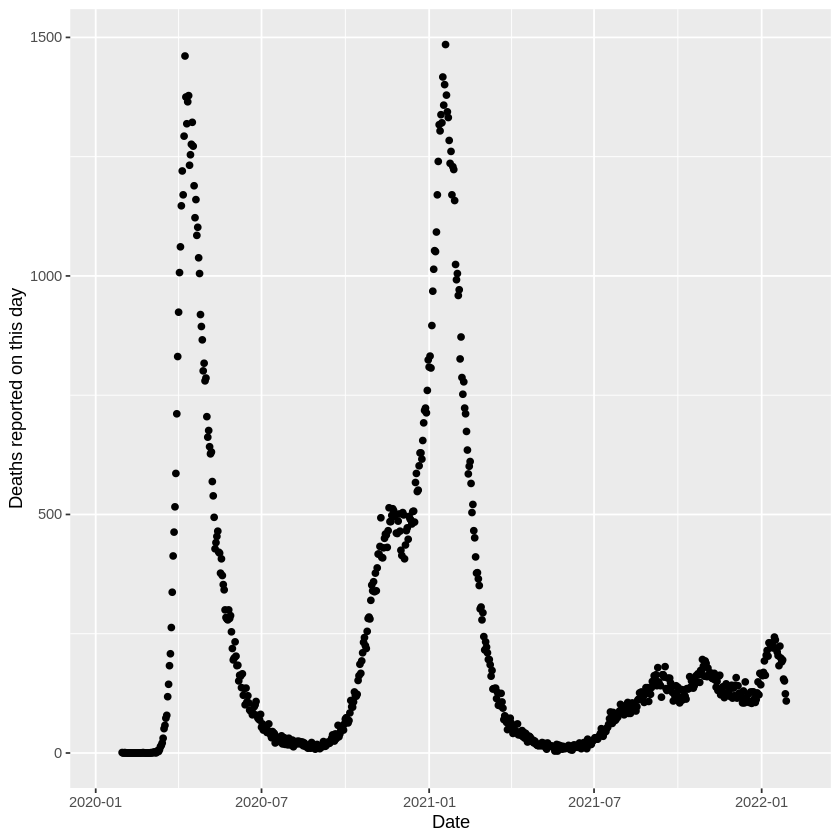

In [67]:
library("ggplot2") #This will be! 

ggplot(data=covidData) + #Plot our data 
    geom_point(aes(x = as.Date(date), #We want the x-axis to be the date, but we need to tell R that it is a date
                  y = newDailyNsoDeathsByDeathDate #Plot the number of deaths reported on that date
                 )
    ) + # Add other stuff! 
    xlab("Date") + ylab("Deaths reported on this day")

* Change the whole of the date column to be a date in this dataset, eliminating the need for the "as.Date" call in ggplot2 
* Create plots of the other columns contained in this dataset 
* Harder question to end this session -- can you calculate the total number of infections, cases and deaths in each of the three main waves visible (at the time of writing!) in the plot above? 

# Conclusions 

This concludes the first part of the Introduction to R course. You should now be able to identify data structures available in R to store data and decide what is a good choice of data structure in some cases.  

We've reviewed some of the basic syntax of the language (using the operators `+-*/`, variables and types, arrays and addressing them with `[square brackets]`, and lists and data frames) and moved into getting "real data" into R and starting to plot it. 

The next part will focus on more R syntax as well as on some functions that are very useful for data manipulation and are available in base R or in one of many packages written for R.